# Gradient Descent

In this tutorial, you'll learn about gradient descent, which is a flexible tool to identify parameters for any models.

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Parameters
alpha = learning_rate = 0.01
iterations = 1000

Like last time, generate synthetic date with $\beta_0 = 5$ and $\beta_1 = 3$. 1000 points should be fine. You should have an array of x and y values.

In [78]:
# Your code
b0 = 5
b1 = 3 

X = np.random.randn(1000) # take from a normal distribution 
noise = np.random.randn(1000) # take from a normal distribution 
# add error 

# b0 + b1 * x + error 
y = b0 + (b1 * my_x) + noise

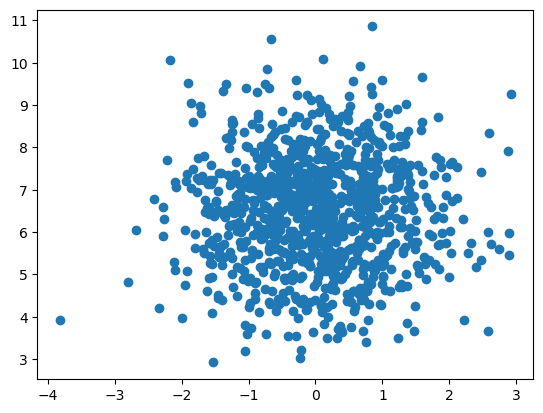

In [79]:
plt.scatter(X, y) # not a line..? 

In the real world, you do not know these beta values. Your goal is to find them! So, pretending you do not know $\beta_0 = 5$ and $\beta_1 = 3$, proceed as if you only observe x and y.

First, randomly guess $\beta_0$ and $\beta_1$, using the random operations in numpy.

In [32]:
# Your code to randomly guess b0 and b1
np.random.seed(27)
b0 = np.random.randn(1) # uniform 0 to 1, randn will draw from mean 0 with std 1 
b1 = np.random.randn(1)
b0, b1

(array([1.28560542]), array([-0.30355338]))

Write a function to compute the cost. This should be $\frac{1}{n} \sum ( y_{pred} - y )^2$. This is known as mean square loss. Your function should take in the real x and y values, then your guess of b0 and b1, then compute the loss.

In [89]:
# Code for mean squared error (MSE)
def mse(x, y, b0, b1):
    n = len(y) 
    y_pred = b0 + (b1 * x) 
    loss = (1/n) * np.sum((y_pred - y) ** 2)
    # you cannot use mean because it sums without the square 

    return loss 

In [83]:
mse(my_x, my_y, 5, 3)

0.3352328515818134

We are now going to walk through one iteration of gradient descent.
* Using the existing guesses for $\beta_0$ and $\beta_1$, generate predictions for y
* Calculate the gradients for $\beta_0$ and $\beta_1$ then use it to update the existing $\beta$ values.
* Compute the cost.

In [ ]:
### FROM HERBERT DEMO 
ycalc = lambda beta_0, beta_1, x: beta: 


In [84]:
# Code for one iteration.
guess_y = b0 + (b1 * my_x)

# calc gradients for b0 and b1 
b0_calc = b0 - alpha* np.mean(np.sum((b1 * my_x) + b0) - guess_y) 
b1_calc = b1 - alpha* np.mean(np.sum((b1 * my_x) + b0) - guess_y)
# can set alpha to be = 0.1 

my_cost = mse(my_x, my_y, b0_calc, b1_calc) 
my_cost

977246.5738918046

Write a for loop that iterates through the total iterations (1000). Within each loop, update $\beta_0$ and $\beta_1$.

Also, create an empty list that saves the cost each iteration, and two other lists for $\beta_0$ and $\beta_1$. You want to see that the loss is going down. To check this, print the loss every 100 iterations.

In [87]:
### HERBERT DEMO 

def GD(b0, b1, x, y, alpha, iters): 
    
    num_iters = 1000 
    for _ in range(num_iters): 
        predicted_y_values = ycalc(b0, b1, x)
        b0 = b0 - alpha / len(x) * np.sum(predicted-y_values - y)
        b1 = b1 - alpha / len(x) * np.sum((predicted-y_values - y) * x)
    return b0, b1
    

In [88]:
GD(800, 800, X, y, 0.5, 10000)

NameError: name 'ycalc' is not defined

In [90]:
# Gradient Descent Function
def gradient_descent(x, y, learning_rate, iterations):
    n = len(y) # number of data points 
    
    # your code here
    b0_hist = []
    b1_hist = []
    cost_history = [] 

    b0 = np.random.randint(1,100)
    b1 = np.random.randint(1,100)
    
    for i in range(iterations): 
        y_pred = b0 + b1 * x # not xi, don't iterate within 
        
        b0 = b0 - learning_rate * ((1/n)*(np.sum(y_pred - y)))
        b1 = b1 - learning_rate * ((1/n)*(np.sum(y_pred - y))*x)

        my_cost = mse(x, y, b0, b1)
        cost_history.append(my_cost)
        
        b0_hist.append(b0)
        b1_hist.append(b1)

        if i % 100 == 0:
            print("Iteration:", i, ", Cost:", cost_history[i], "b0:", b0_hist[i], "b1:", b1_hist[i])
    
    return b0, b1, cost_history

# Run Gradient Descent
# parameters were alr given 
final_b0, final_b1, cost_history = gradient_descent(X, y,learning_rate, iterations)

Iteration: 0 , Cost: 6993.6443440269095 b0: 70.71364550924567 b1: [65.80597923 62.42779098 64.34186706 61.41769859 56.41798179 61.59874655
 57.79432775 67.84465699 70.49088353 61.3066947  58.91053012 58.88633568
 55.72210012 64.24926266 60.12428599 67.67980063 56.37147171 45.56414445
 48.42433273 74.53544667 59.60284141 55.37401901 50.88487419 59.03110894
 58.19615764 59.68984512 58.07034256 59.1781328  60.77681276 61.93814493
 69.87488198 67.21758551 49.85053547 65.91620315 58.1260222  68.1236555
 64.3193906  61.18924589 63.12918042 66.17780127 65.40292172 59.44704394
 70.43391104 61.20744393 69.73191375 56.4451766  52.58380232 66.69368076
 51.57801665 56.91687811 52.85858268 69.5782943  56.3625973  63.82089373
 60.38118369 62.42464792 56.21472137 61.67569615 66.92060678 58.20470837
 57.3490153  57.5308079  73.34566246 59.0413544  69.45000364 62.10697187
 66.01681066 60.08212015 50.51933892 67.28486778 58.75039198 62.92594798
 54.91533463 56.26991996 71.78738    62.29523436 72.7969715

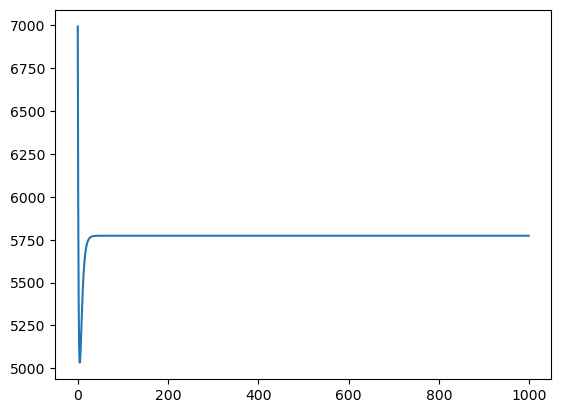

In [96]:
plt.plot(cost_history) # power law distribution/curve 

Plot a scatter plot of the x and y, then your regression line. You should use plt.plot and input predicted y values based on $x_{min}$ and $x_{max}$.

Plot the cost overtime. X-axis is the iteration, y-axis is the cost.

Plot the evolution of the beta values.